**Inteligencia Artificial Tarea 2.1**

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sb

In [42]:
#leemos el csv
df = pd.read_csv('datos7.csv')
print(df)

    Estatura(m)  Peso(Kg)  Edad               Nombre
0          1.73        73    32        Dani Carvajal
1          1.85        78    26         Éder Militão
2          1.80        78    32          David Alaba
3          1.83        78    27        Jesús Vallejo
4          1.68        68    25          Fran García
5          1.91        83    31      Antonio Rüdiger
6          1.80        73    29        Ferland Mendy
7          1.88        79    19         Jacobo Ramón
8          1.70        63    20        David Jiménez
9          1.85        73    21      Jude Bellingham
10         1.83        68    21    Eduardo Camavinga
11         1.83        78    26    Federico Valverde
12         1.73        66    39          Luka Modric
13         1.88        81    24  Aurélien Tchouaméni
14         1.75        67    19           Arda Güler
15         1.73        68    33        Lucas Vázquez
16         1.78        68    28        Dani Ceballos
17         1.70        58    25          Brahi

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Estatura(m)  23 non-null     float64
 1   Peso(Kg)     23 non-null     int64  
 2   Edad         23 non-null     int64  
 3   Nombre       23 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 864.0+ bytes


<Axes: xlabel='Estatura(m)', ylabel='Peso(Kg)'>

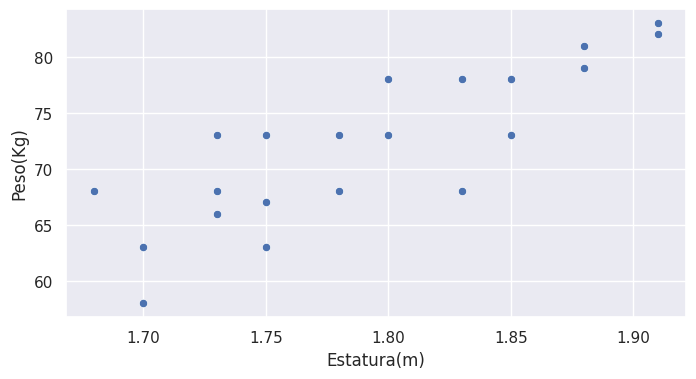

In [44]:
sb.scatterplot(x='Estatura(m)', y='Peso(Kg)', data=df)

<Axes: >

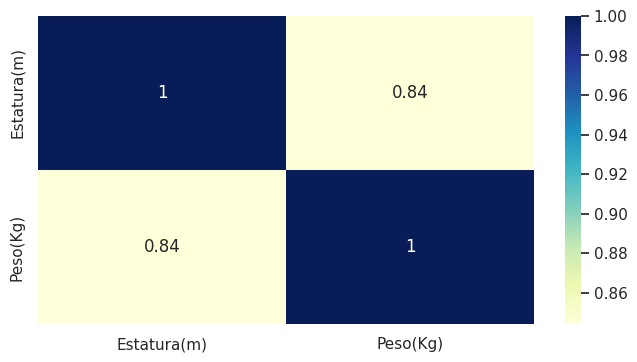

In [45]:
#Creo un DF temporal para por ver un mapa de calor:

df_datosEvaluados = df.loc[:, ['Estatura(m)', 'Peso(Kg)']]

sb.set(rc={'figure.figsize':(8,4)})
sb.heatmap(data=df_datosEvaluados.corr(), annot=True, cmap='YlGnBu' )

In [46]:
# Separar las características (X) y la variable objetivo (y)
X = df[['Estatura(m)']]
y = df['Peso(Kg)']

In [63]:
# Se Dividin los datos (entrenamiento y prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
# Creo el Modelo de Regresión Lineal
modelo = LinearRegression()

In [65]:
# Entrenar el Modelo

modelo.fit(X_train, y_train)

LinearRegression()

In [66]:
# Hacer las predicciones
y_pred = modelo.predict(X_test)

In [67]:
# Score de presición
modelo.score(X_test, y_test)

0.6930242374763121

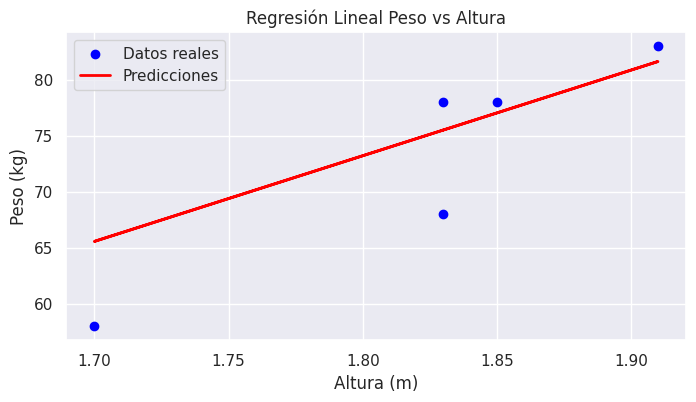

In [68]:
# Visualizar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.title('Regresión Lineal Peso vs Altura')
plt.legend()
plt.show()

In [70]:
# Predicción para una nueva altura

Altura = 1.73
peso_estimado = modelo.predict([[Altura]])
print(f'El peso estimado para una altura de {Altura} es: {peso_estimado[0]:.2f} kg')

El peso estimado para una altura de 1.73 es: 67.87 kg


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#¿Funciona bien o no? ¿Por qué cree que es así?

R// No funciona:
Considero que no, porque un factor importante es la calidad de datos que tengo, en este caso no tuve que depurarlos (porque solo solo solicita la relacion con 1 caracteristica), pero queda claro que un buen analísis sobre la data arroja buena calidad de datos y con ello nos lleva a un score más preciso, en este caso es insuficiente la caracteristica para determinar el peso, porque si bien es cierto, la altura es un aspecto a considerar, pero no podemos determinar el peso considerando únicamente esta característica.